In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE

In [59]:
df=pd.read_csv("C:/Users/HP/Downloads/data - data (1).csv")

In [60]:
df.head()

Bankrupt?  ROA(C) before interest and depreciation before interest  \
0          1                                           0.370594         
1          1                                           0.464291         
2          1                                           0.426071         
3          1                                           0.399844         
4          1                                           0.465022         

   ROA(A) before interest and % after tax  \
0                                0.424389   
1                                0.538214   
2                                0.499019   
3                                0.451265   
4                                0.538432   

   ROA(B) before interest and depreciation after tax  Operating Gross Margin  \
0                                           0.405750                0.601457   
1                                           0.516730                0.610235   
2                                           0.472295                0.601450   
3                                           0.457733                0.583541   
4                                           0.522298                0.598783   

   Realized Sales Gross Margin  Operating Profit Rate  \
0                     0.601457               0.998969   
1                     0.610235               0.998946   
2                     0.601364               0.998857   
3                     0.583541               0.998700   
4                     0.598783               0.998973   

   Pre-tax net Interest Rate  After-tax net Interest Rate  \
0                   0.796887                     0.808809   
1                   0.797380                     0.809301   
2                   0.796403                     0.808388   
3                   0.796967                     0.808966   
4                   0.797366                     0.809304   

   Non-industry income and expenditure/revenue  ...  \
0                                     0.302646  ...   
1                                     0.303556  ...   
2                                     0.302035  ...   
3                                     0.303350  ...   
4                                     0.303475  ...   

   Net Income to Total Assets  Total assets to GNP price  No-credit Interval  \
0                    0.716845                   0.009219            0.622879   
1                    0.795297                   0.008323            0.623652   
2                    0.774670                   0.040003            0.623841   
3                    0.739555                   0.003252            0.622929   
4                    0.795016                   0.003878            0.623521   

   Gross Profit to Sales  Net Income to Stockholder's Equity  \
0               0.601453                            0.827890   
1               0.610237                            0.839969   
2               0.601449                            0.836774   
3               0.583538                            0.834697   
4               0.598782                            0.839973   

   Liability to Equity  Degree of Financial Leverage (DFL)  \
0             0.290202                            0.026601   
1             0.283846                            0.264577   
2             0.290189                            0.026555   
3             0.281721                            0.026697   
4             0.278514                            0.024752   

   Interest Coverage Ratio (Interest expense to EBIT)  Net Income Flag  \
0                                           0.564050                 1   
1                                           0.570175                 1   
2                                           0.563706                 1   
3                                           0.564663                 1   
4                                           0.575617                 1   

   Equity to Liability  
0             0.016469  
1             0.020794  
2           

In [61]:
df.tail()

Bankrupt?  ROA(C) before interest and depreciation before interest  \
6814          0                                           0.493687         
6815          0                                           0.475162         
6816          0                                           0.472725         
6817          0                                           0.506264         
6818          0                                           0.493053         

      ROA(A) before interest and % after tax  \
6814                                0.539468   
6815                                0.538269   
6816                                0.533744   
6817                                0.559911   
6818                                0.570105   

      ROA(B) before interest and depreciation after tax  \
6814                                           0.543230   
6815                                           0.524172   
6816                                           0.520638   
6817                                           0.554045   
6818                                           0.549548   

      Operating Gross Margin  Realized Sales Gross Margin  \
6814                0.604455                     0.604462   
6815                0.598308                     0.598308   
6816                0.610444                     0.610213   
6817                0.607850                     0.607850   
6818                0.627409                     0.627409   

      Operating Profit Rate  Pre-tax net Interest Rate  \
6814               0.998992                   0.797409   
6815               0.998992                   0.797414   
6816               0.998984                   0.797401   
6817               0.999074                   0.797500   
6818               0.998080                   0.801987   

      After-tax net Interest Rate  \
6814                     0.809331   
6815                     0.809327   
6816                     0.809317   
6817                     0.809399   
6818                     0.813800   

      Non-industry income and expenditure/revenue  ...  \
6814                                     0.303510  ...   
6815                                     0.303520  ...   
6816                                     0.303512  ...   
6817                                     0.303498  ...   
6818                                     0.313415  ...   

      Net Income to Total Assets  Total assets to GNP price  \
6814                    0.799927                   0.000466   
6815                    0.799748                   0.001959   
6816                    0.797778                   0.002840   
6817                    0.811808                   0.002837   
6818                    0.815956                   0.000707   

      No-credit Interval  Gross Profit to Sales  \
6814            0.623620               0.604455   
6815            0.623931               0.598306   
6816            0.624156               0.610441   
6817            0.623957               0.607846   
6818            0.626680               0.627408   

      Net Income to Stockholder's Equity  Liability to Equity  \
6814                            0.840359             0.279606   
6815                            0.840306             0.278132   
6816                            0.840138             0.275789   
6817                            0.841084             0.277547   
6818                            0.841019             0.275114   

      Degree of Financial Leverage (DFL)  \
6814                            0.027064   
6815                            0.027009   
6816                            0.026791   
6817                            0.026822   
6818                            0.026793   

      Interest Coverage Ratio (Interest expense to EBIT)  Net Income Flag  \
6814                                           0.566193                 1   
6815                                           0.566018                 1   
6816                                        

In [62]:
df.shape

(6819, 96)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Bankrupt?                                                6819 non-null   int64  
 1   ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2   ROA(A) before interest and % after tax                   6819 non-null   float64
 3   ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4   Operating Gross Margin                                   6819 non-null   float64
 5   Realized Sales Gross Margin                              6819 non-null   float64
 6   Operating Profit Rate                                    6819 non-null   float64
 7   Pre-tax net Interest Rate                                6819 non-null   float64
 8   After-tax net Interest Rate 

In [64]:
df.count()

Bankrupt?                                                  6819
ROA(C) before interest and depreciation before interest    6819
ROA(A) before interest and % after tax                     6819
ROA(B) before interest and depreciation after tax          6819
Operating Gross Margin                                     6819
                                                           ... 
Liability to Equity                                        6819
Degree of Financial Leverage (DFL)                         6819
Interest Coverage Ratio (Interest expense to EBIT)         6819
Net Income Flag                                            6819
Equity to Liability                                        6819
Length: 96, dtype: int64

conclusion:with this we get to know how many rows are present in the column

In [65]:
df.isnull().sum()

Bankrupt?                                                  0
ROA(C) before interest and depreciation before interest    0
ROA(A) before interest and % after tax                     0
ROA(B) before interest and depreciation after tax          0
Operating Gross Margin                                     0
                                                          ..
Liability to Equity                                        0
Degree of Financial Leverage (DFL)                         0
Interest Coverage Ratio (Interest expense to EBIT)         0
Net Income Flag                                            0
Equity to Liability                                        0
Length: 96, dtype: int64

CONCLUSION:
this shows that there is no null values present in the DataFrame

In [66]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ",duplicate_rows_df.shape)

number of duplicate rows:  (0, 96)


conclusion: this shows that there are no duplicate present in the column 

In [67]:
df.describe()

Bankrupt?  ROA(C) before interest and depreciation before interest  \
count  6819.000000                                        6819.000000         
mean      0.032263                                           0.505180         
std       0.176710                                           0.060686         
min       0.000000                                           0.000000         
25%       0.000000                                           0.476527         
50%       0.000000                                           0.502706         
75%       0.000000                                           0.535563         
max       1.000000                                           1.000000         

       ROA(A) before interest and % after tax  \
count                             6819.000000   
mean                                 0.558625   
std                                  0.065620   
min                                  0.000000   
25%                                  0.535543   
50%                                  0.559802   
75%                                  0.589157   
max                                  1.000000   

       ROA(B) before interest and depreciation after tax  \
count                                        6819.000000   
mean                                            0.553589   
std                                             0.061595   
min                                             0.000000   
25%                                             0.527277   
50%                                             0.552278   
75%                                             0.584105   
max                                             1.000000   

       Operating Gross Margin  Realized Sales Gross Margin  \
count             6819.000000                  6819.000000   
mean                 0.607948                     0.607929   
std                  0.016934                     0.016916   
min                  0.000000                     0.000000   
25%                  0.600445                     0.600434   
50%                  0.605997                     0.605976   
75%                  0.613914                     0.613842   
max                  1.000000                     1.000000   

       Operating Profit Rate  Pre-tax net Interest Rate  \
count            6819.000000                6819.000000   
mean                0.998755                   0.797190   
std                 0.013010                   0.012869   
min                 0.000000                   0.000000   
25%                 0.998969                   0.797386   
50%                 0.999022                   0.797464   
75%                 0.999095                   0.797579   
max                 1.000000                   1.000000   

       After-tax net Interest Rate  \
count                  6819.000000   
mean                      0.809084   
std                       0.013601   
min                       0.000000   
25%                       0.809312   
50%                       0.809375   
75%                       0.809469   
max                       1.000000   

       Non-industry income and expenditure/revenue  ...  \
count                                  6819.000000  ...   
mean                                      0.303623  ...   
std                                       0.011163  ...   
min                                       0.000000  ...   
25%                                       0.303466  ...   
50%                                       0.303525  ...   
75%                                       0.303585  ...   
max                                       1.000000  ...   

       Net Income to Total Assets  Total assets to GNP price  \
count                 6819.000000               6.819000e+03   
mean                     0.807760               1.862942e+07   
std                      0.040332               3.764501e+08   
min                      0.000000               0.000000e+00   
25%                      0.7

#computing outliers

In [ ]:
def impute_outliers(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Replace outliers with bounds
    df.loc[df[column] < lower_bound, column] = lower_bound
    df.loc[df[column] > upper_bound, column] = upper_bound

    return df

# List of columns to impute (excluding 'Bankrupt?')
columns_to_impute = df.columns.difference(['Bankrupt?','Current Liability to Current Assets','Net Income Flag'])

# Apply the imputation function to each column
for column in columns_to_impute:
    df = impute_outliers(df, column)

# Check the counts of 'Bankrupt?' after imputation
print(df['Bankrupt?'].value_counts())


#removing outliers with the iqr

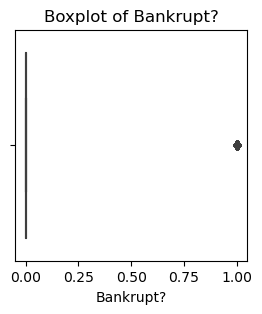

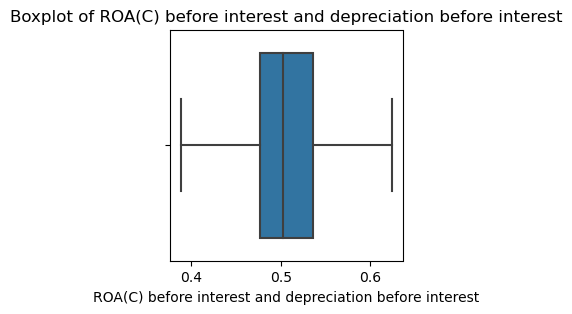

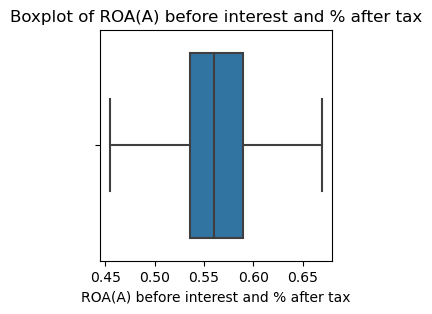

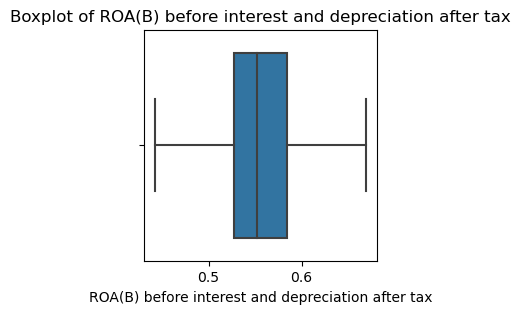

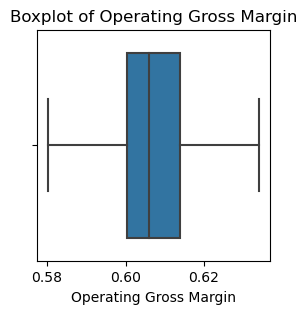

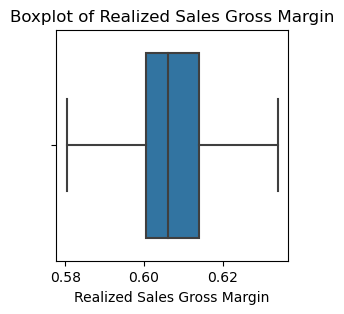

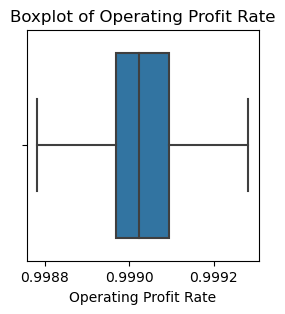

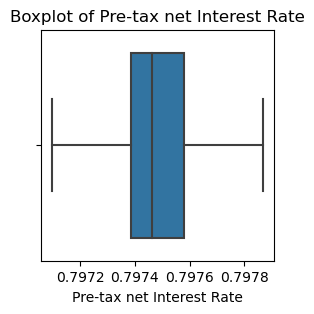

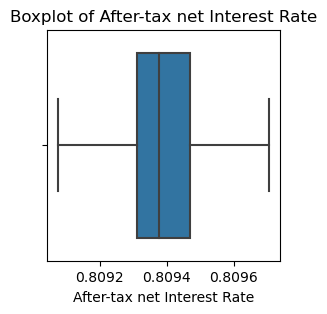

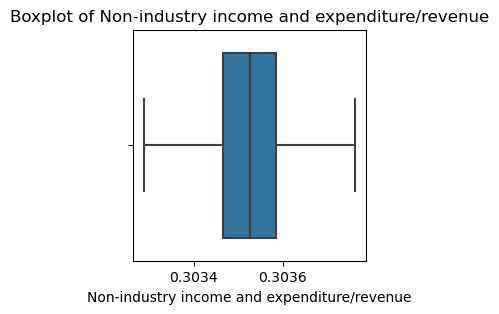

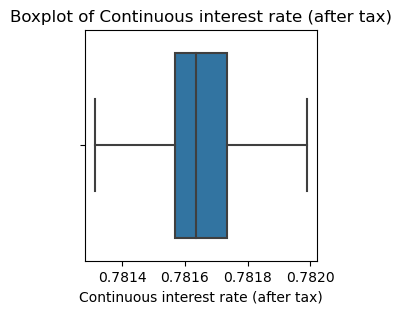

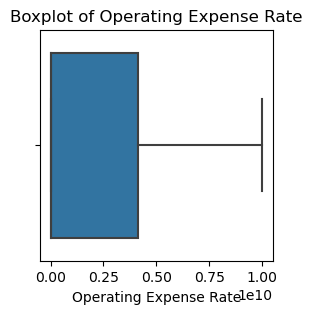

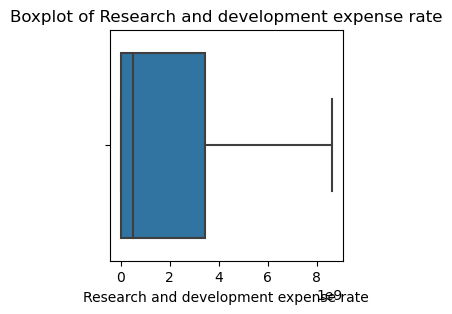

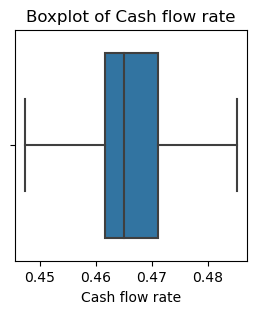

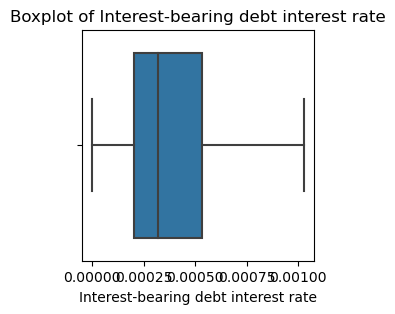

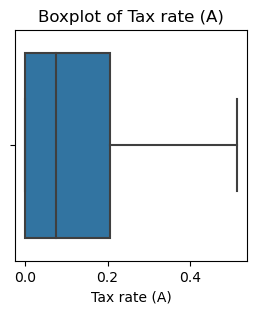

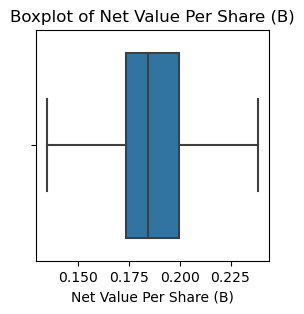

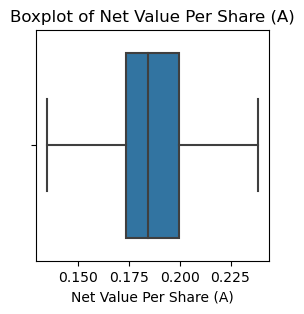

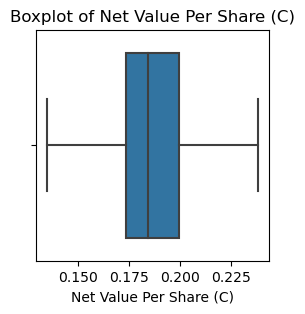

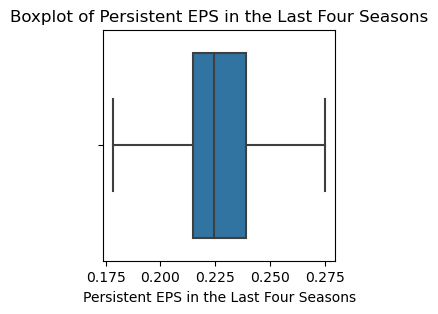

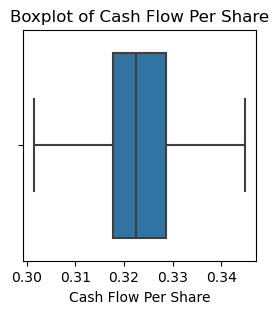

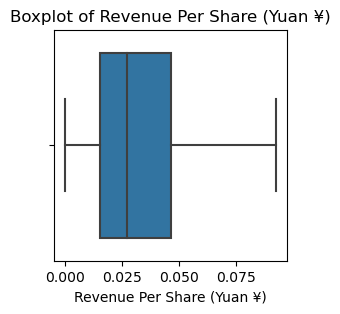

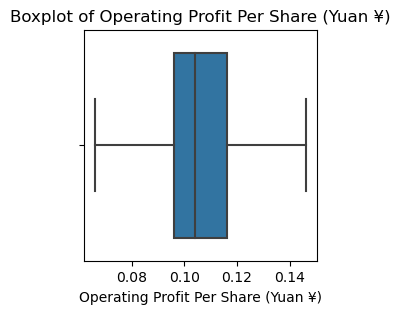

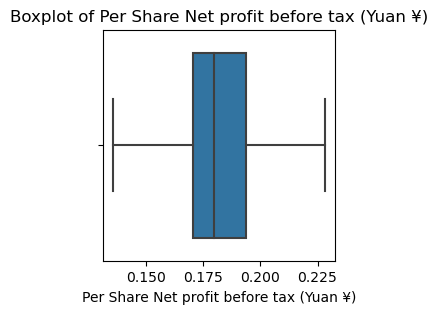

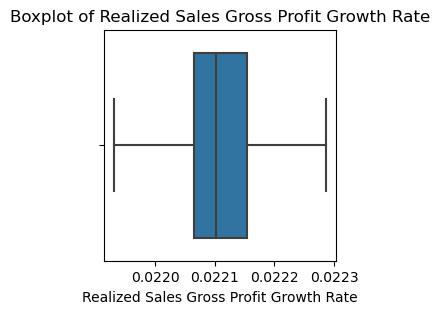

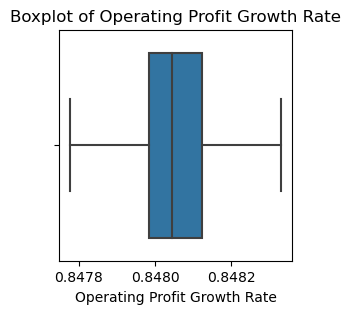

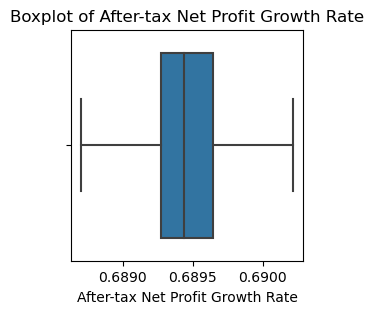

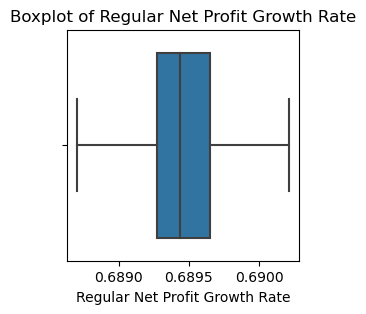

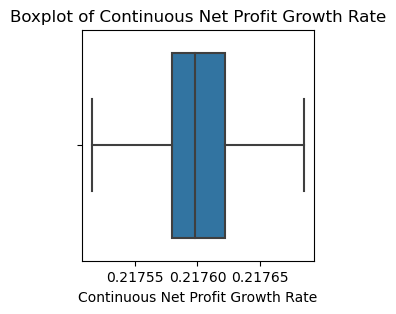

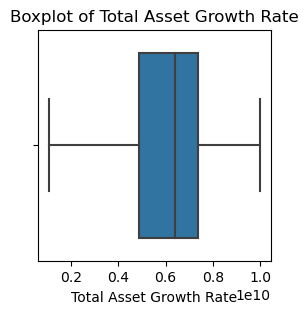

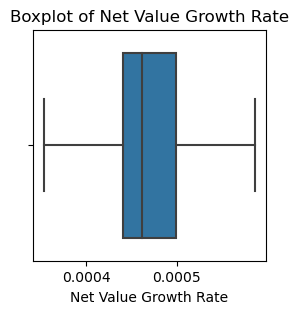

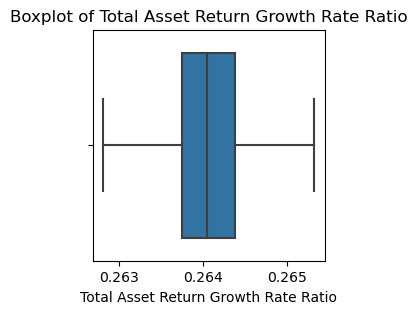

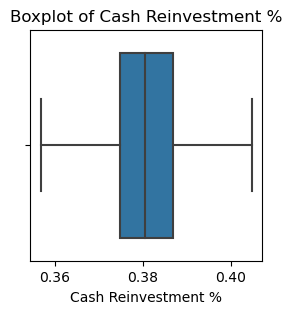

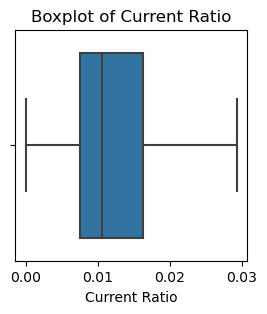

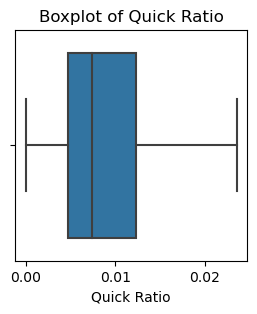

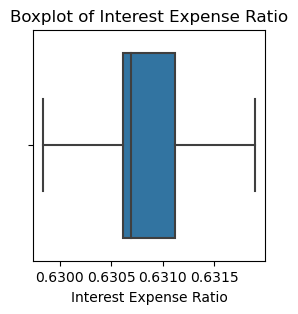

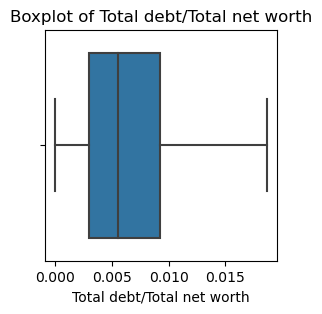

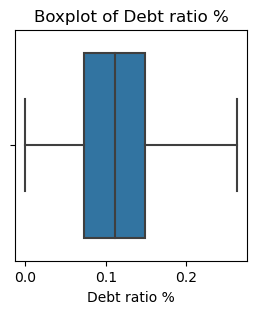

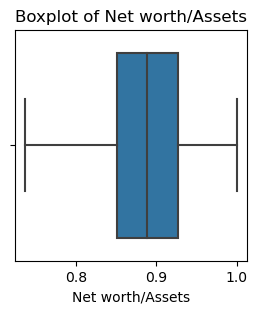

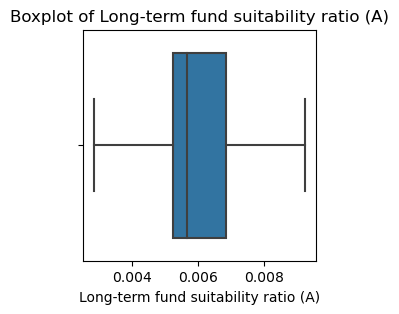

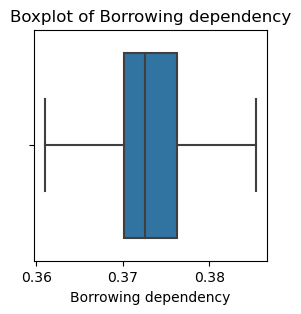

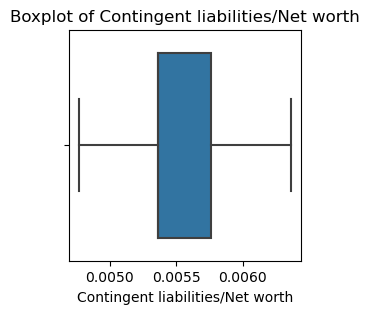

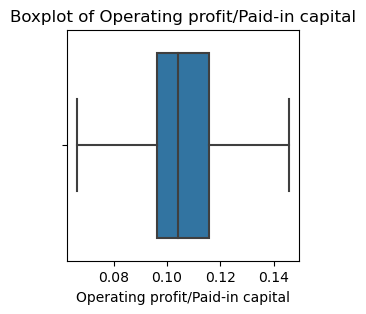

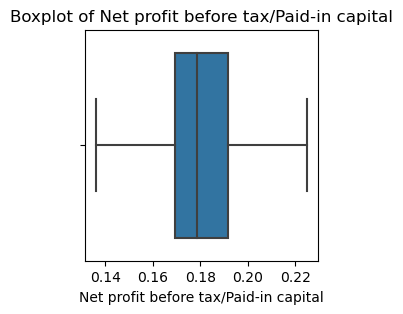

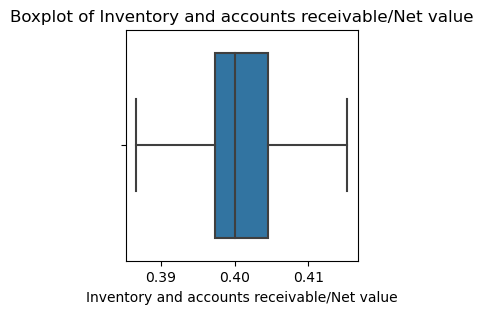

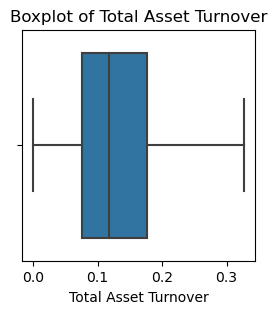

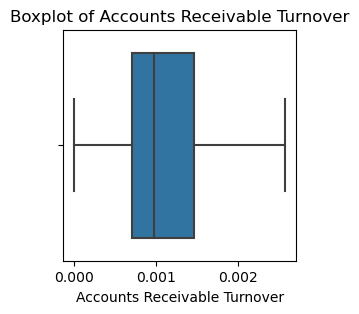

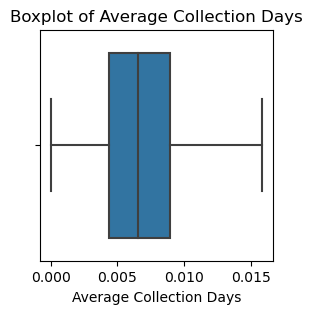

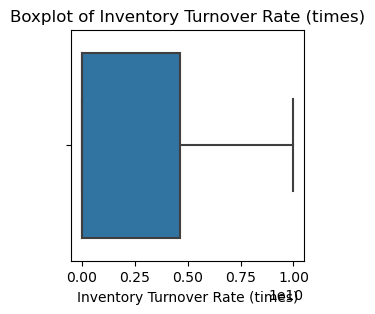

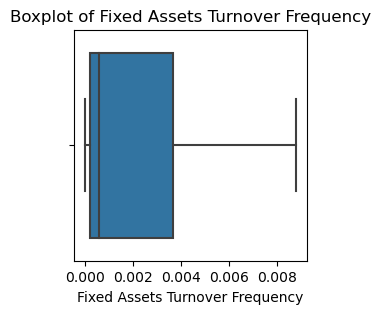

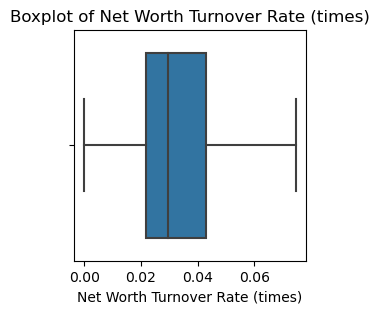

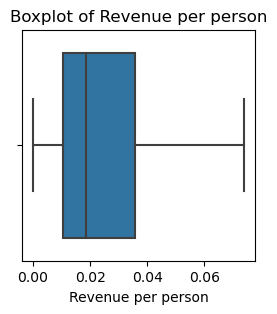

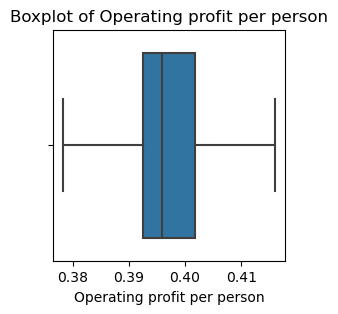

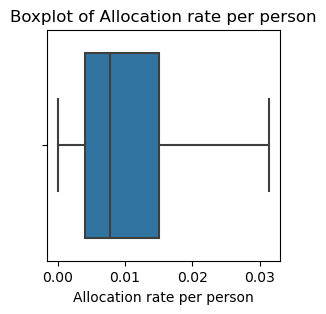

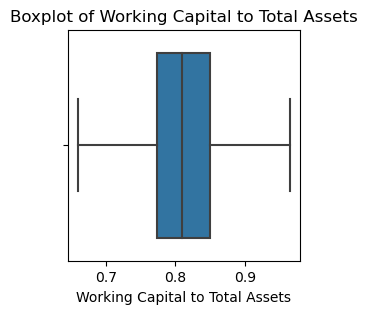

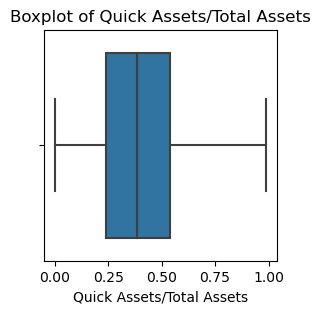

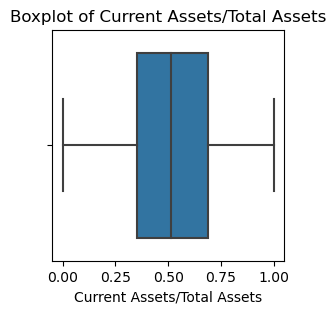

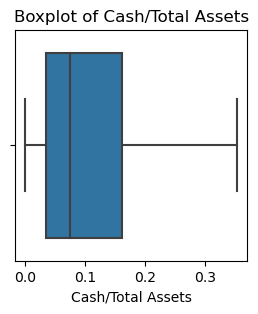

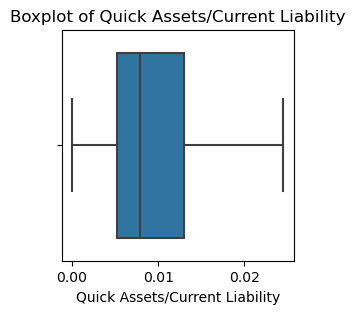

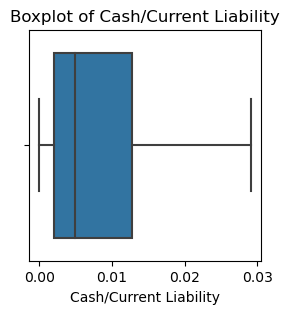

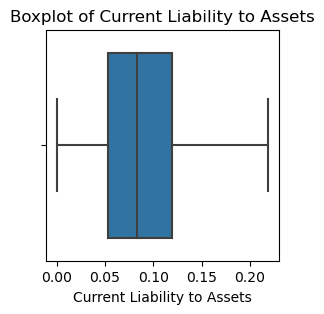

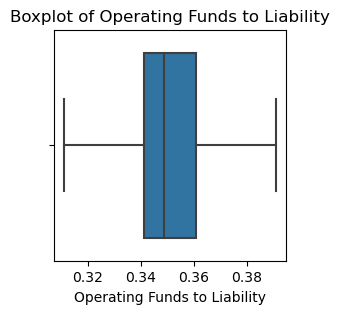

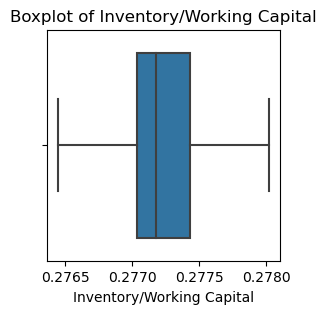

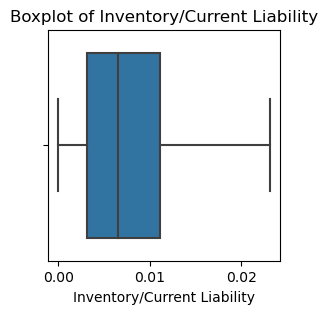

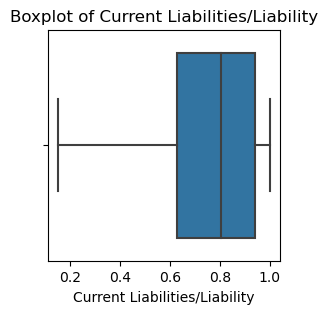

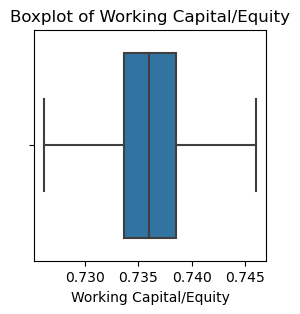

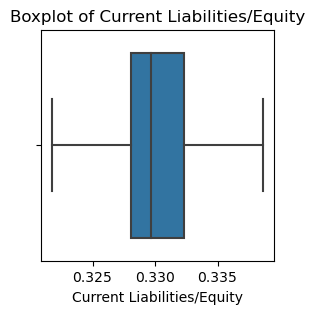

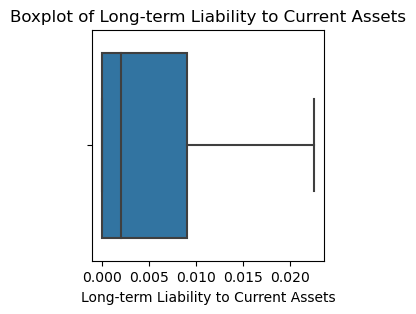

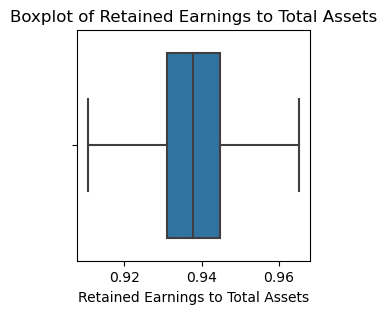

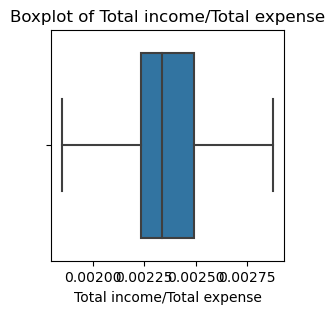

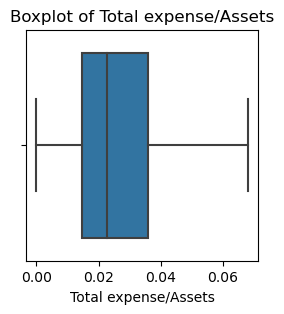

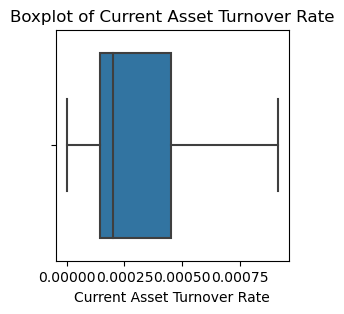

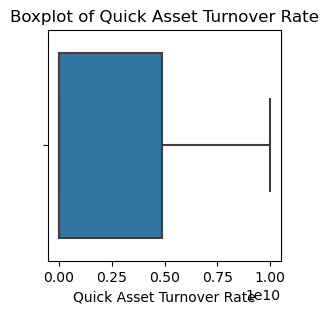

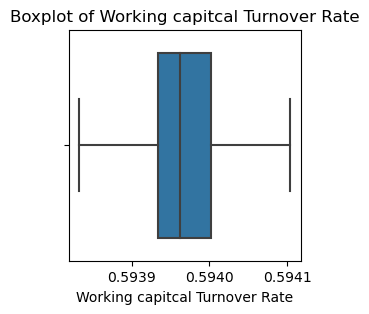

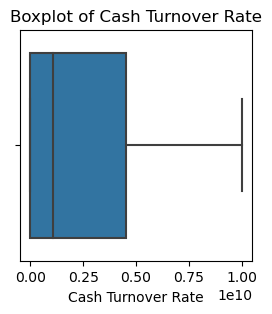

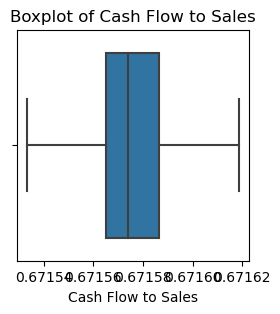

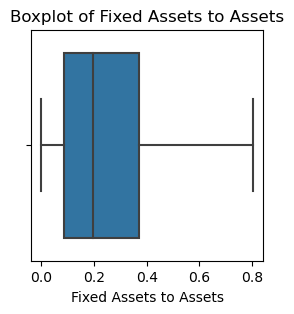

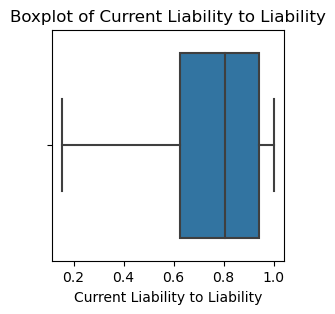

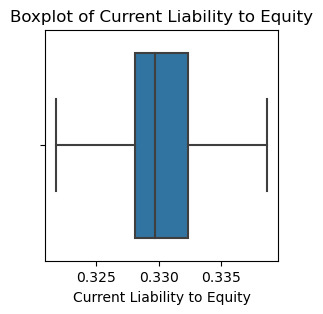

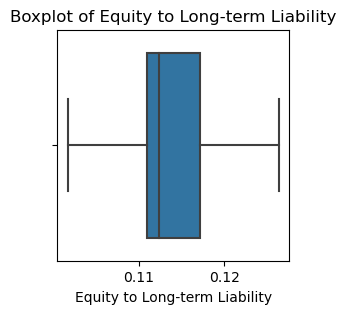

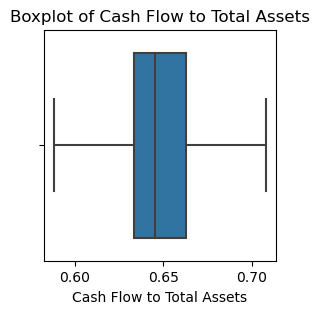

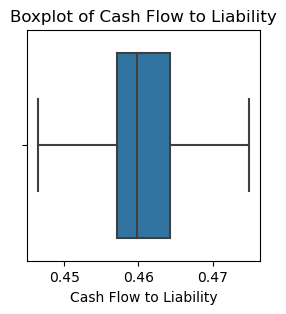

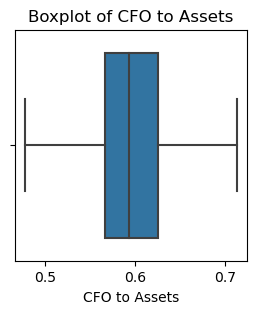

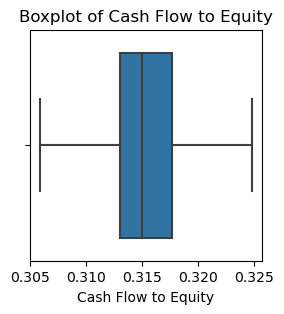

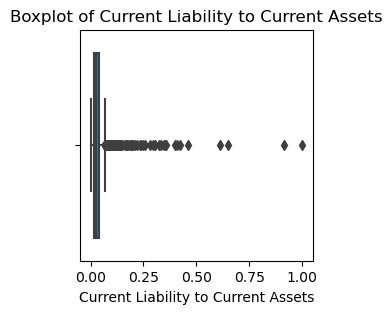

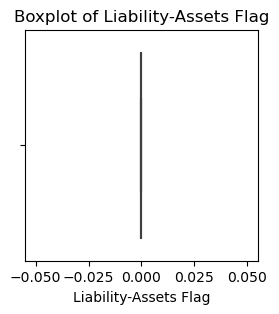

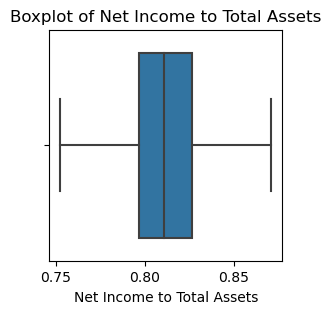

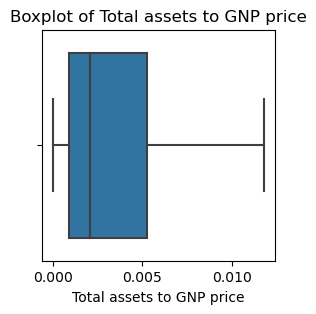

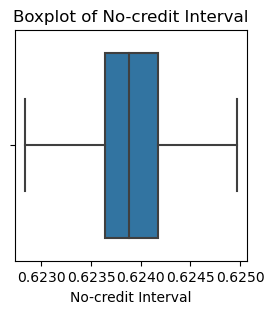

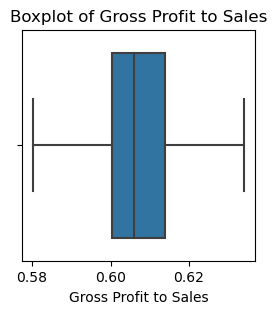

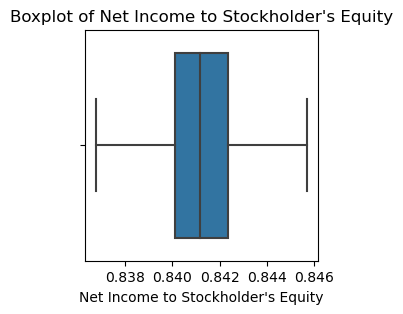

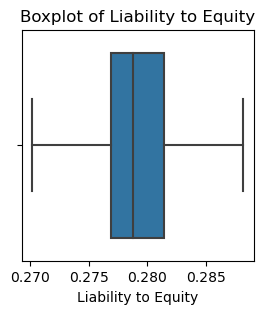

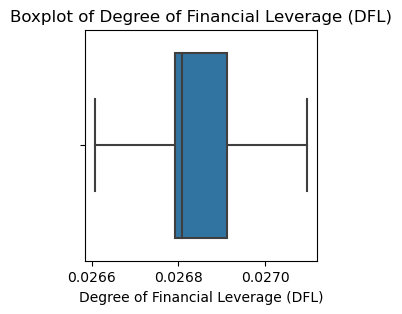

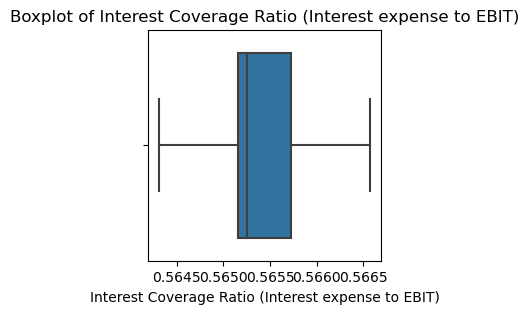

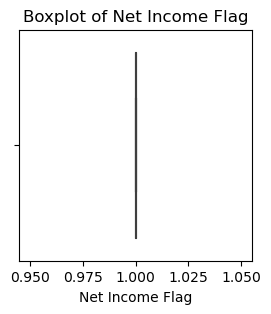

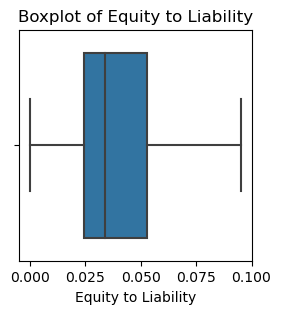

In [69]:
for column in df.columns:
    plt.figure(figsize=(3, 3))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.show()

plotting boxplot for after removing all the outliers

In [70]:
# Compute the correlation matrix
correlation_matrix = df.corr()

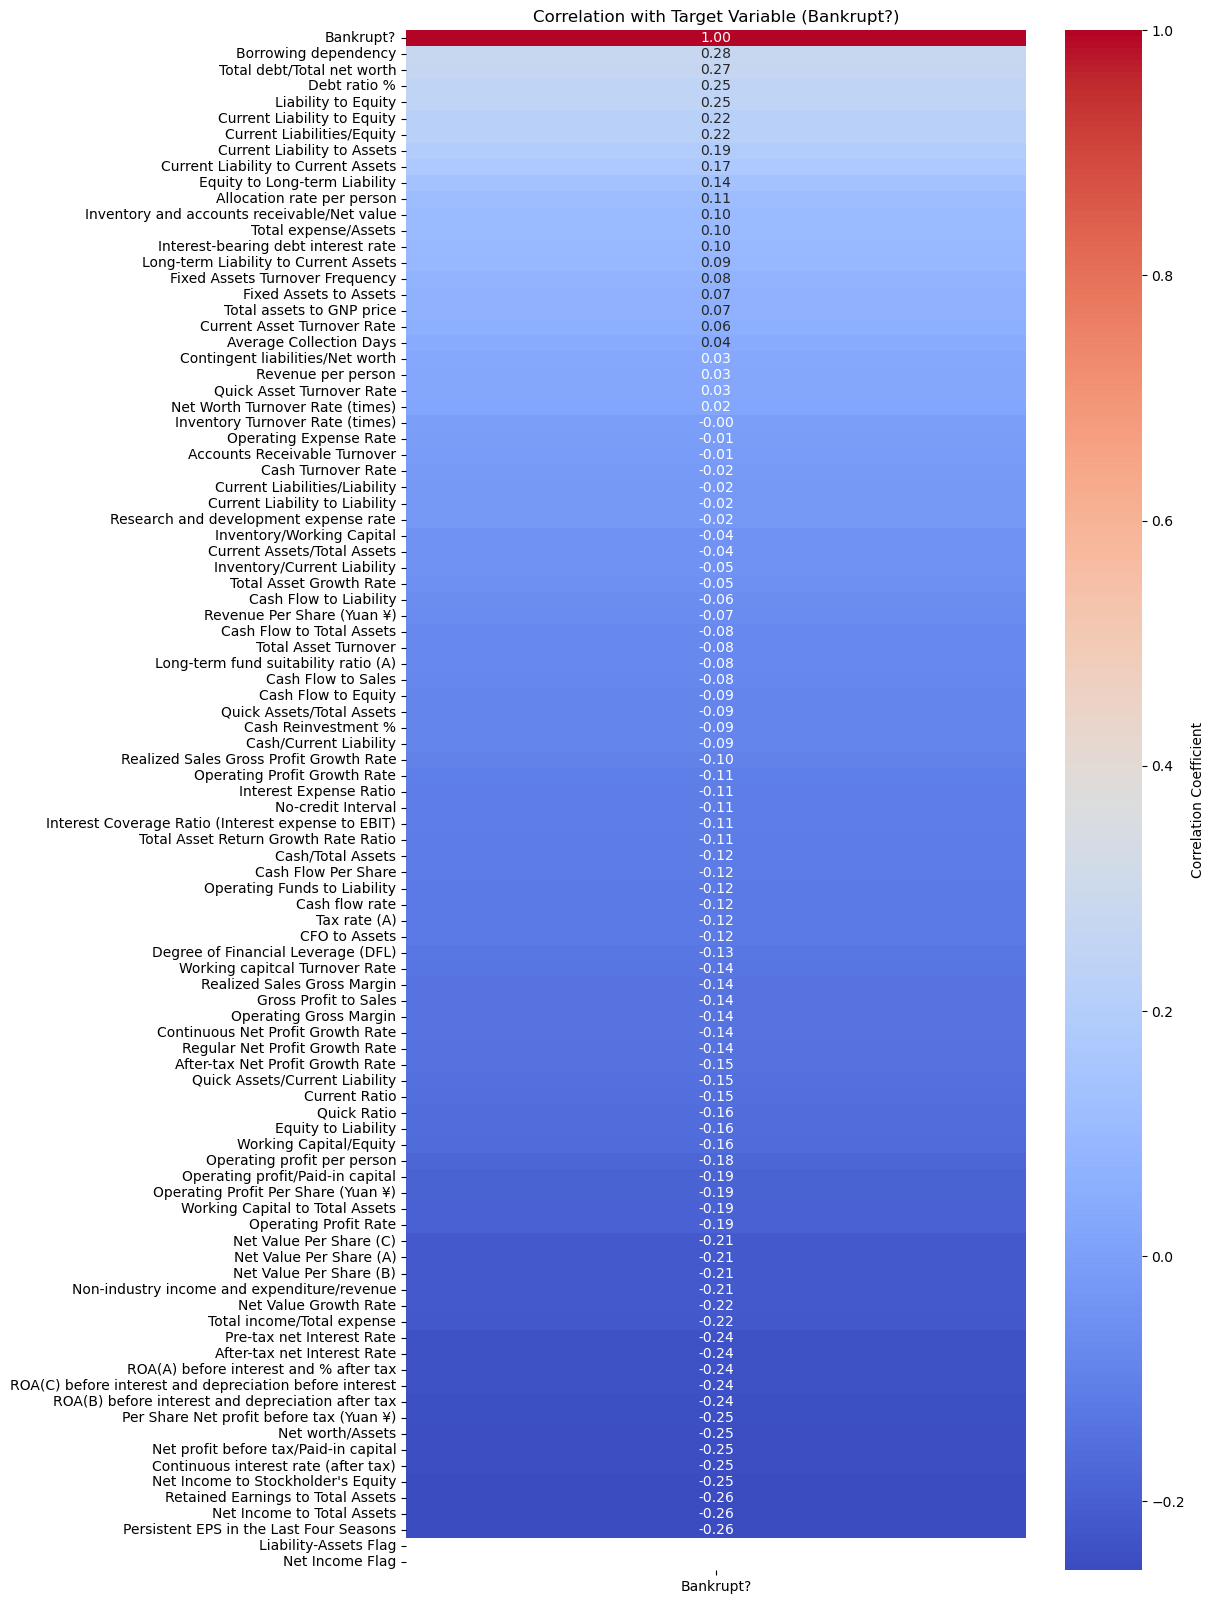

In [71]:
# Extract the correlation of each feature with the target variable
target_correlation = correlation_matrix['Bankrupt?'].sort_values(ascending=False)

# Plot the correlations with the target variable
plt.figure(figsize=(10, 20))
sns.heatmap(target_correlation.to_frame(), annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation with Target Variable (Bankrupt?)')
plt.show()

GETTING CORRELATION AND SORTING THE CORRELATION

In [74]:
target_correlation = correlation_matrix['Bankrupt?']
(target_correlation).sort_values(ascending=False) #printing correlation of each column with target column 'Bankrupt? '

Bankrupt?                                  1.000000
Borrowing dependency                       0.278367
Total debt/Total net worth                 0.272914
Debt ratio %                               0.246535
Liability to Equity                        0.246176
                                             ...   
Retained Earnings to Total Assets         -0.255218
Net Income to Total Assets                -0.255797
Persistent EPS in the Last Four Seasons   -0.256159
Liability-Assets Flag                           NaN
Net Income Flag                                 NaN
Name: Bankrupt?, Length: 96, dtype: float64

In [75]:
sorted_correlations = correlation_matrix['Bankrupt?'].abs().sort_values(ascending=False)
#used abs to convert negative values into postitve and sort the values in descending order

In [86]:

df = df.drop('Liability-Assets Flag', axis=1)

In [ ]:
df = df.drop('Net Income Flag', axis=1)

In [82]:
df.shape

(6819, 95)

In [83]:
df.describe()

Bankrupt?  ROA(C) before interest and depreciation before interest  \
count  6819.000000                                        6819.000000         
mean      0.032263                                           0.505667         
std       0.176710                                           0.051483         
min       0.000000                                           0.387973         
25%       0.000000                                           0.476527         
50%       0.000000                                           0.502706         
75%       0.000000                                           0.535563         
max       1.000000                                           0.624116         

       ROA(A) before interest and % after tax  \
count                             6819.000000   
mean                                 0.560507   
std                                  0.050087   
min                                  0.455122   
25%                                  0.535543   
50%                                  0.559802   
75%                                  0.589157   
max                                  0.669579   

       ROA(B) before interest and depreciation after tax  \
count                                        6819.000000   
mean                                            0.554691   
std                                             0.050277   
min                                             0.442034   
25%                                             0.527277   
50%                                             0.552278   
75%                                             0.584105   
max                                             0.669348   

       Operating Gross Margin  Realized Sales Gross Margin  \
count             6819.000000                  6819.000000   
mean                 0.607834                     0.607812   
std                  0.010758                     0.010725   
min                  0.580240                     0.580321   
25%                  0.600445                     0.600434   
50%                  0.605997                     0.605976   
75%                  0.613914                     0.613842   
max                  0.634118                     0.633954   

       Operating Profit Rate  Pre-tax net Interest Rate  \
count            6819.000000                6819.000000   
mean                0.999028                   0.797467   
std                 0.000120                   0.000189   
min                 0.998781                   0.797096   
25%                 0.998969                   0.797386   
50%                 0.999022                   0.797464   
75%                 0.999095                   0.797579   
max                 0.999282                   0.797868   

       After-tax net Interest Rate  \
count                  6819.000000   
mean                      0.809378   
std                       0.000157   
min                       0.809075   
25%                       0.809312   
50%                       0.809375   
75%                       0.809469   
max                       0.809706   

       Non-industry income and expenditure/revenue  ...  \
count                                  6819.000000  ...   
mean                                      0.303526  ...   
std                                       0.000124  ...   
min                                       0.303288  ...   
25%                                       0.303466  ...   
50%                                       0.303525  ...   
75%                                       0.303585  ...   
max                                       0.303764  ...   

       Liability-Assets Flag  Net Income to Total Assets  \
count                 6819.0                 6819.000000   
mean                     0.0                    0.810070   
std                      0.0                    0.027735   
min                      0.0                    0.752193   
25%                      0.0                    

#conclusion this shows that only 3.2 companies are bankrupt

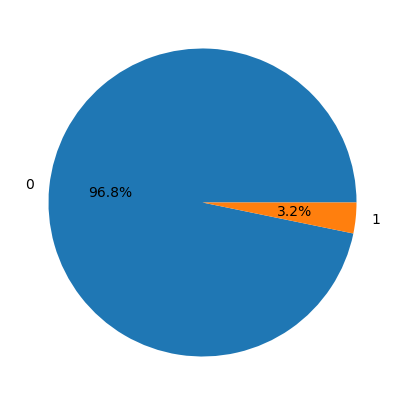

In [45]:

bankrupt_counts = df['Bankrupt?'].value_counts()

plt.figure(figsize=(5,5))
plt.pie(bankrupt_counts, labels=bankrupt_counts.index, autopct='%1.1f%%')
plt.show()

#conclusion this shows that only 3.2 companies are bankrupt

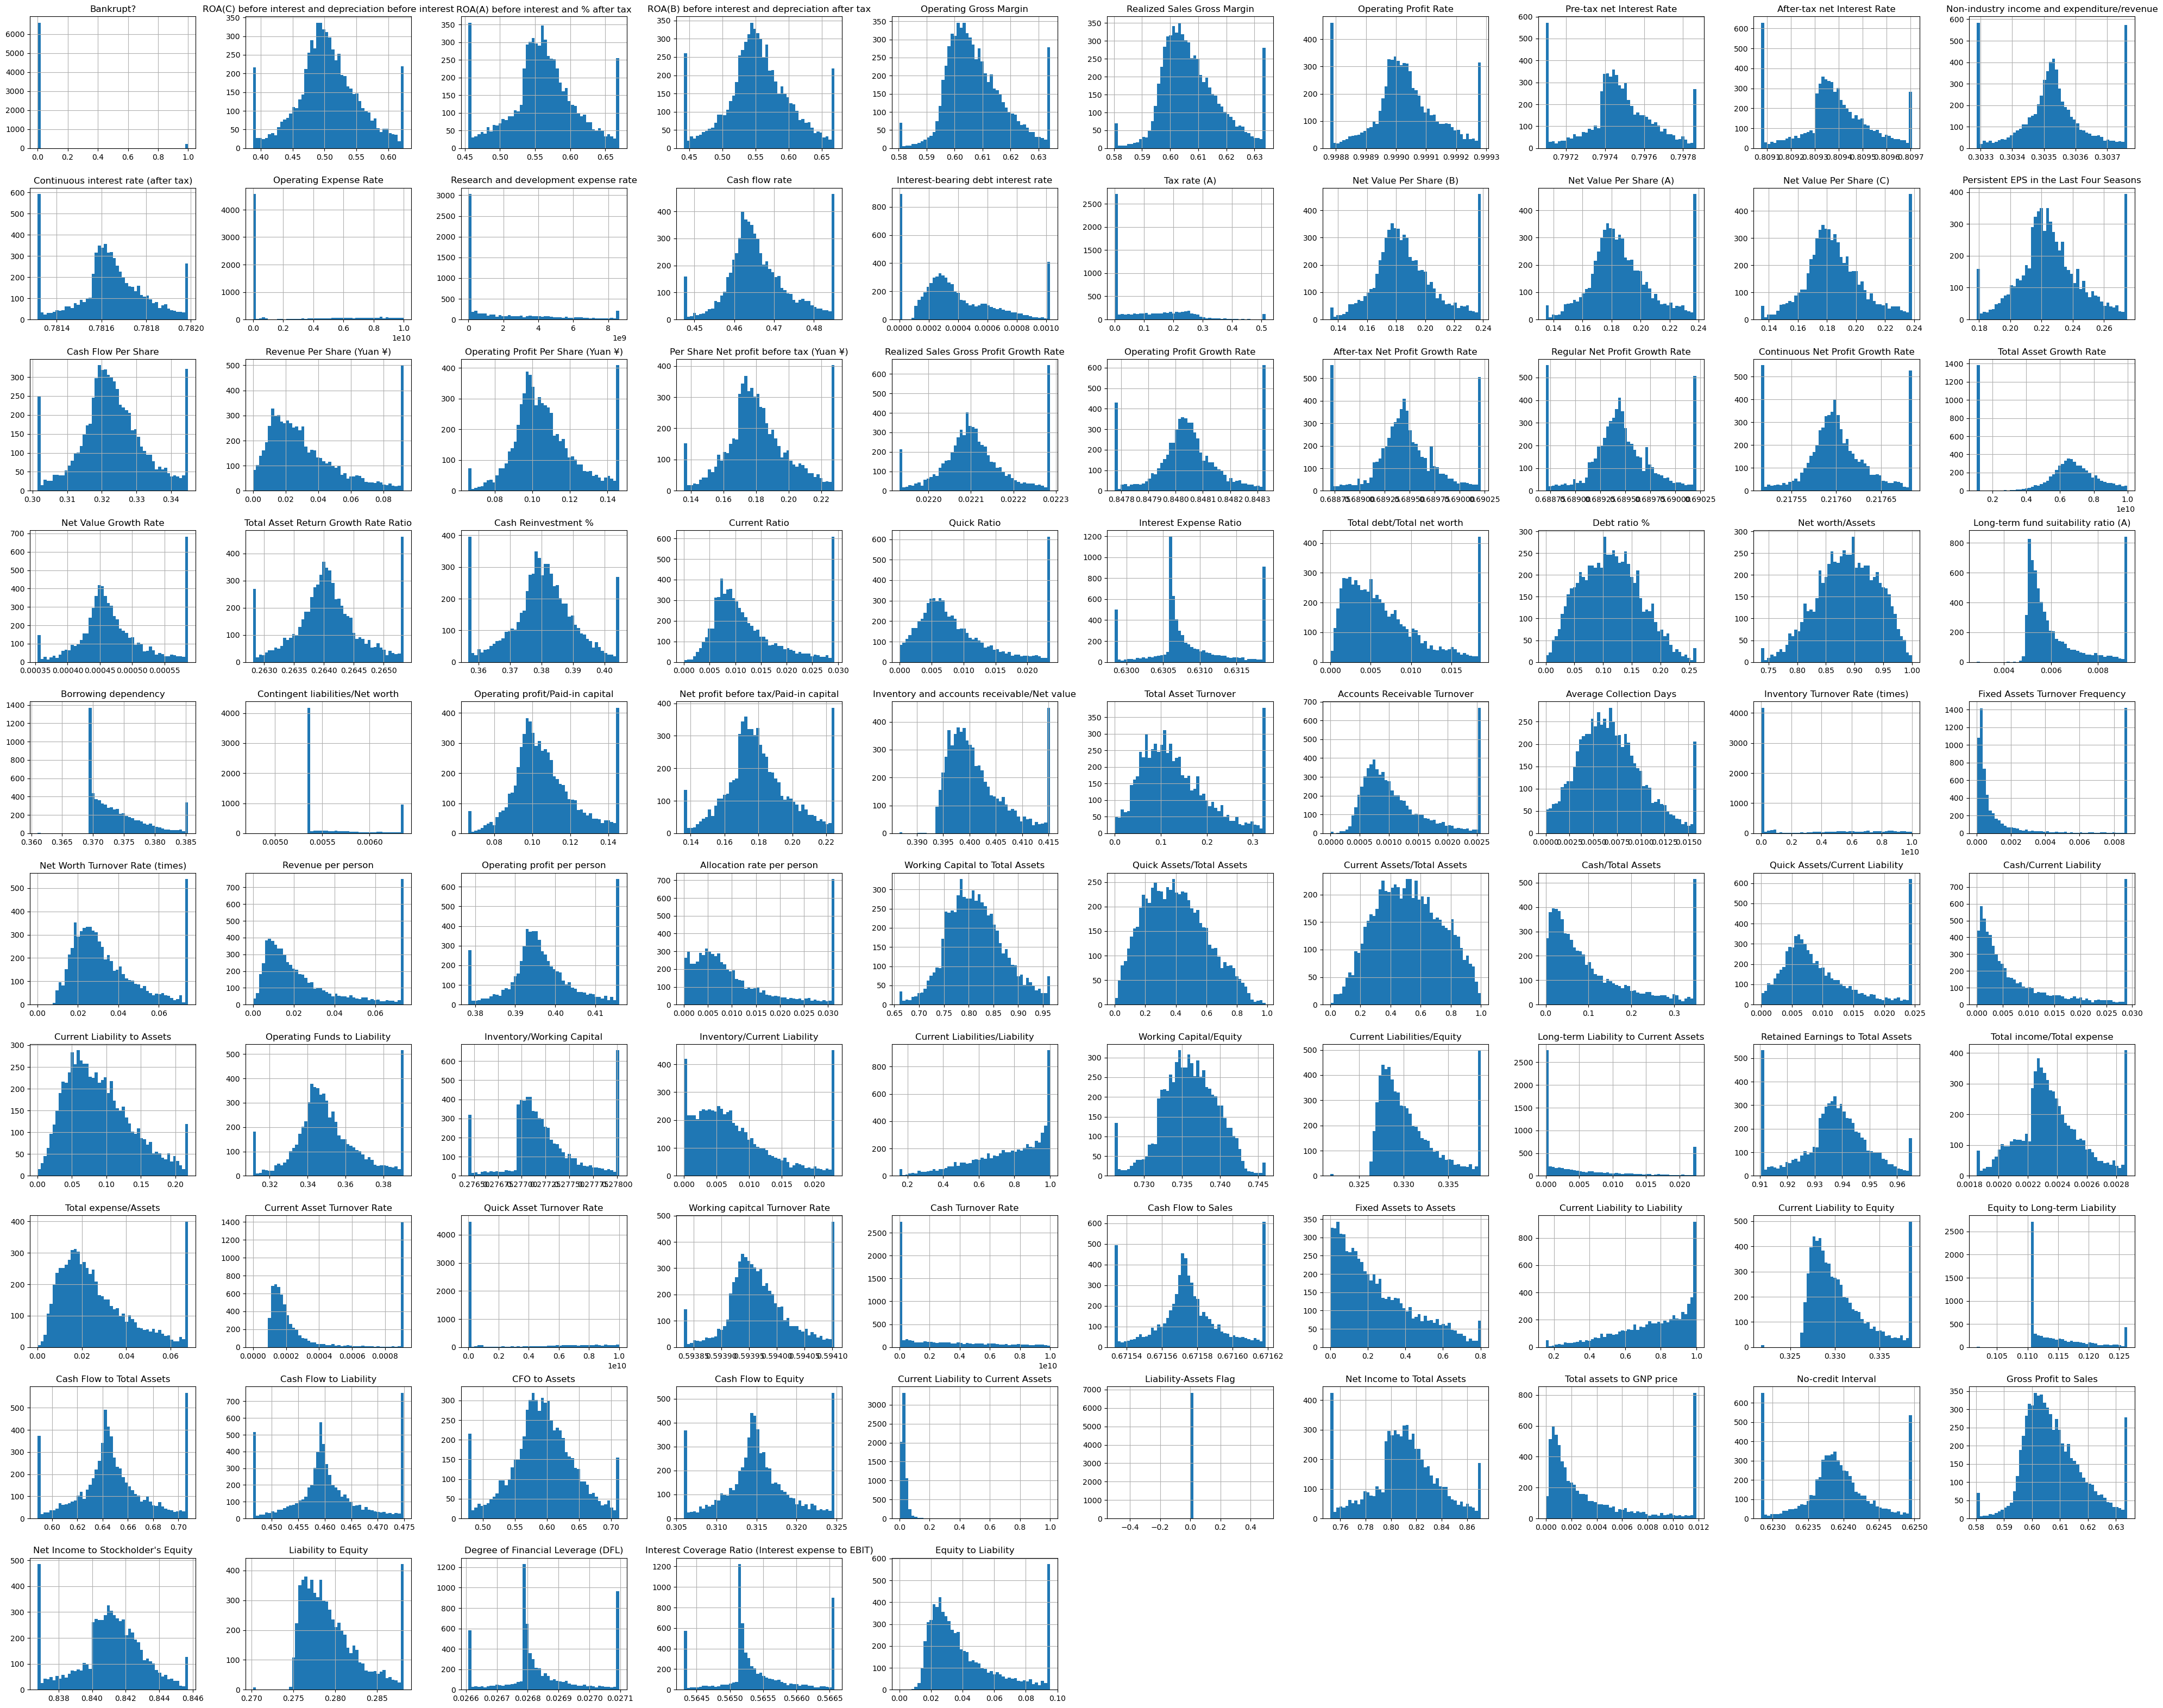

In [85]:
import pandas as pd
import matplotlib.pyplot as plt

# Plot histograms for all columns
df.hist(bins=50, figsize=(50,40))
plt.show()


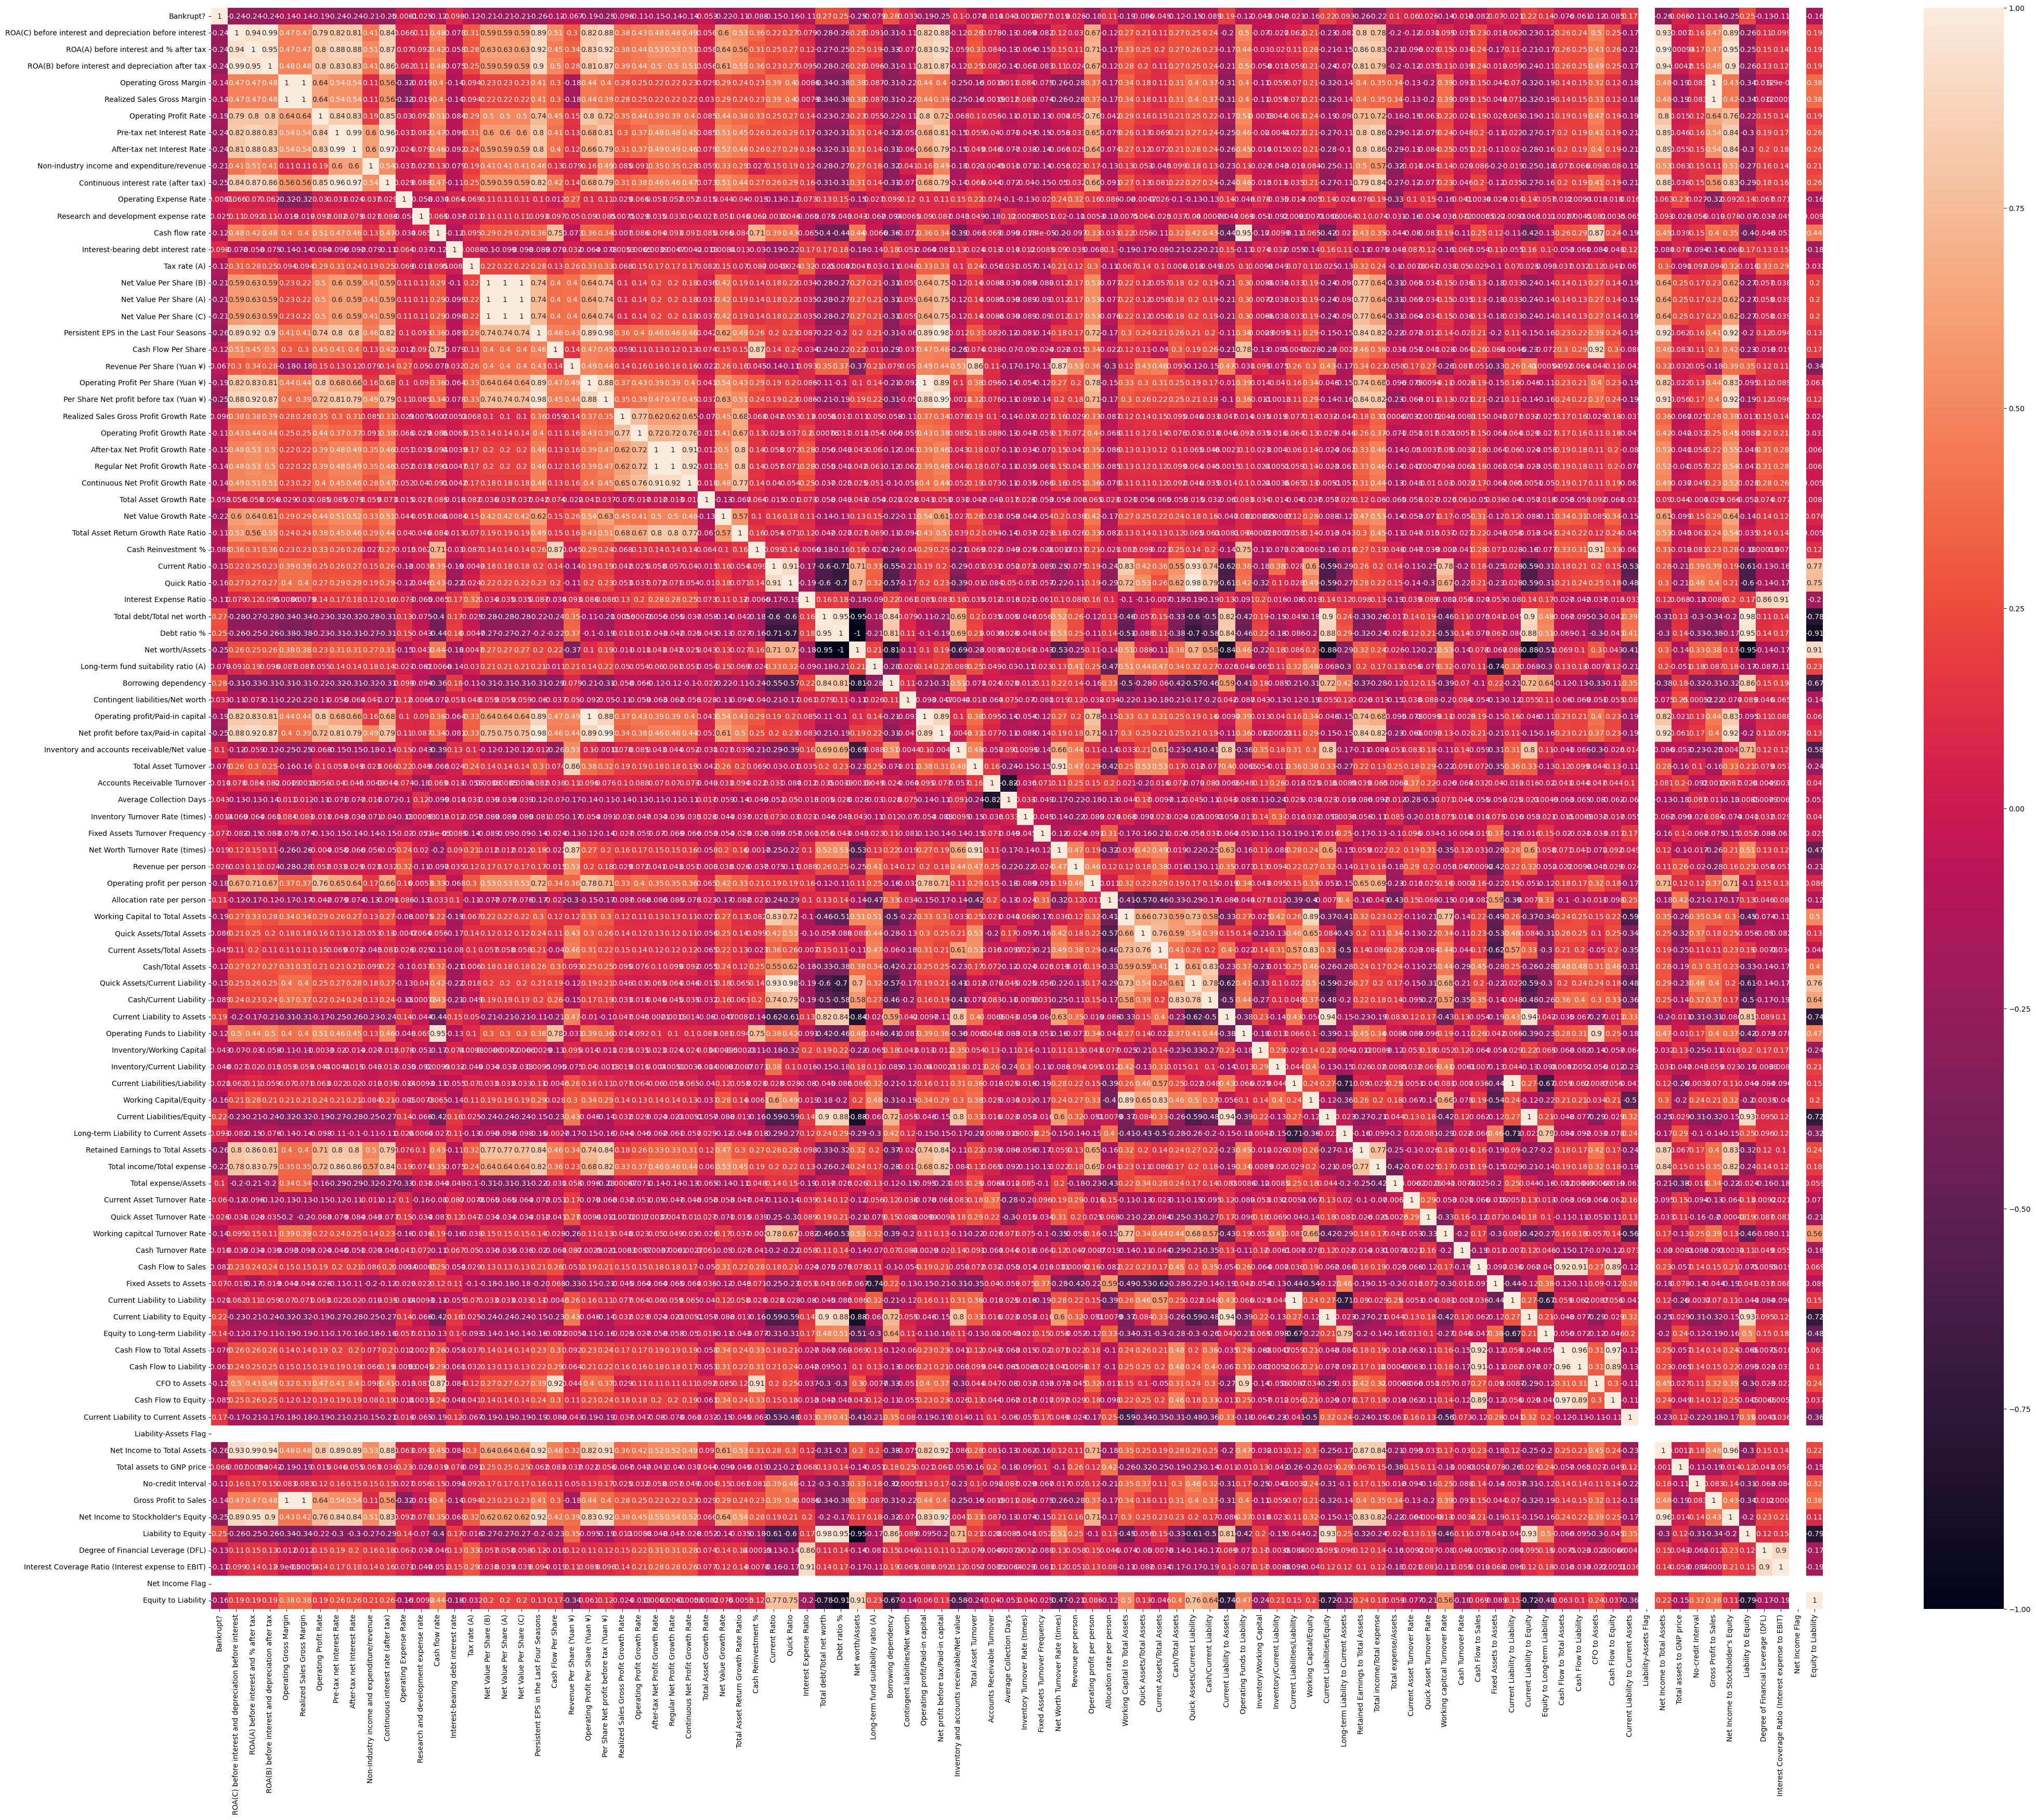

In [23]:
plt.figure(figsize=(50,40))
c=df.corr()
sns.heatmap(c,cmap="rocket",annot=True)
c
plt.show()

#HYPOTHESIS

In [21]:
from scipy.stats import ttest_ind

# Perform t-tests for each feature
t_test_results = {}
for feature in df:
    bankrupt = df[df['Bankrupt?'] == 1][feature]
    non_bankrupt = df[df['Bankrupt?'] == 0][feature]
    t_stat, p_value = ttest_ind(bankrupt, non_bankrupt, equal_var=False)  # Welch's t-test for unequal variances
    t_test_results[feature] = (t_stat, p_value)

# Convert the results to a DataFrame for better visualization
t_test_df = pd.DataFrame(t_test_results, index=['T-statistic', 'P-value']).T
t_test_df['Significant'] = t_test_df['P-value'] < 0.05
print(t_test_df)


C:\Users\HP\AppData\Local\Temp\ipykernel_26868\4057095387.py:8: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t_stat, p_value = ttest_ind(bankrupt, non_bankrupt, equal_var=False)  # Welch's t-test for unequal variances


                                                    T-statistic       P-value  \
Bankrupt?                                                   inf  0.000000e+00   
ROA(C) before interest and depreciation before ...   -25.030232  3.955147e-69   
ROA(A) before interest and % after tax               -25.699161  2.511005e-71   
ROA(B) before interest and depreciation after tax    -25.286773  6.666437e-70   
Operating Gross Margin                               -11.903356  7.226332e-26   
...                                                         ...           ...   
Liability to Equity                                   17.175834  5.054258e-43   
Degree of Financial Leverage (DFL)                    -8.487697  2.713894e-15   
Interest Coverage Ratio (Interest expense to EBIT)    -6.638099  2.324134e-10   
Net Income Flag                                             NaN           NaN   
Equity to Liability                                  -27.493683  2.678201e-83   

                           

In [27]:
import scipy.stats as stats

# Perform t-tests for each feature
significant_features = []
for column in df.columns[:-1]:  # Exclude the target variable
    t_stat, p_value = stats.ttest_ind(df[column][df['Bankrupt?'] == 1], df[column][df['Bankrupt?'] == 0])
    if p_value < 0.05:
        significant_features.append(column)

# Display significant features
significant_features


C:\Users\HP\AppData\Local\Temp\ipykernel_26868\3428770508.py:6: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t_stat, p_value = stats.ttest_ind(df[column][df['Bankrupt?'] == 1], df[column][df['Bankrupt?'] == 0])


['Bankrupt?',
 'ROA(C) before interest and depreciation before interest',
 'ROA(A) before interest and % after tax',
 'ROA(B) before interest and depreciation after tax',
 'Operating Gross Margin',
 'Realized Sales Gross Margin',
 'Operating Profit Rate',
 'Pre-tax net Interest Rate',
 'After-tax net Interest Rate',
 'Non-industry income and expenditure/revenue',
 'Continuous interest rate (after tax)',
 'Research and development expense rate',
 'Cash flow rate',
 'Interest-bearing debt interest rate',
 'Tax rate (A)',
 'Net Value Per Share (B)',
 'Net Value Per Share (A)',
 'Net Value Per Share (C)',
 'Persistent EPS in the Last Four Seasons',
 'Cash Flow Per Share',
 'Revenue Per Share (Yuan ¥)',
 'Operating Profit Per Share (Yuan ¥)',
 'Per Share Net profit before tax (Yuan ¥)',
 'Realized Sales Gross Profit Growth Rate',
 'Operating Profit Growth Rate',
 'After-tax Net Profit Growth Rate',
 'Regular Net Profit Growth Rate',
 'Continuous Net Profit Growth Rate',
 'Total Asset Growth

In [44]:
non_significant_rows = t_test_df[t_test_df['Significant'] == False]
non_significant_rows

T-statistic   P-value  Significant
Operating Expense Rate             -0.499326  0.618019        False
Accounts Receivable Turnover       -1.102318  0.271466        False
Inventory Turnover Rate (times)    -0.121369  0.903502        False
Net Worth Turnover Rate (times)     1.393417  0.164836        False
Current Liabilities/Liability      -1.743477  0.082562        False
Cash Turnover Rate                 -1.811313  0.071333        False
Current Liability to Liability     -1.743477  0.082562        False
Liability-Assets Flag                    NaN       NaN        False
Net Income Flag                          NaN       NaN        False

In [46]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=10)
pca_features = pca.fit_transform(df.drop('Bankrupt?', axis=1))

# Create a DataFrame for PCA features
pca_df = pd.DataFrame(data=pca_features, columns=[f'PCA_{i+1}' for i in range(10)])
pca_df['Bankrupt?'] = df['Bankrupt?']

# Display the explained variance ratio
pca.explained_variance_ratio_


array([2.47564768e-01, 2.04187710e-01, 1.62171518e-01, 1.49388852e-01,
       1.22250219e-01, 1.14436933e-01, 2.71052513e-21, 7.51685080e-22,
       3.89833866e-22, 3.16889713e-22])

In [47]:
import numpy as np

# Create interaction features
df['ROA(C)_times_Operating_Profit_Rate'] = df['ROA(C) before interest and depreciation before interest'] * df['Operating Profit Rate']
df['ROA(A)_times_Cash_Flow_Per_Share'] = df['ROA(A) before interest and % after tax'] * df['Cash Flow Per Share']

# Create ratio features
df['Operating_Profit_to_Expense_Rate'] = df['Operating Profit Rate'] / (df['Operating Expense Rate'] + 1e-5)  # Avoid division by zero

# Log transformations
df['Log_Operating_Profit_Per_Share'] = np.log1p(df['Operating Profit Per Share (Yuan ¥)'])
df['Log_Revenue_Per_Share'] = np.log1p(df['Revenue Per Share (Yuan ¥)'])

# Check the new features
print(df.head())


   Bankrupt?  ROA(C) before interest and depreciation before interest  \
0          1                                           0.387973         
1          1                                           0.464291         
2          1                                           0.426071         
3          1                                           0.399844         
4          1                                           0.465022         

   ROA(A) before interest and % after tax  \
0                                0.455122   
1                                0.538214   
2                                0.499019   
3                                0.455122   
4                                0.538432   

   ROA(B) before interest and depreciation after tax  Operating Gross Margin  \
0                                           0.442034                0.601457   
1                                           0.516730                0.610235   
2                                           0.4722

In [48]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop(columns=['Bankrupt?']))

# Apply PCA
pca = PCA(n_components=10)  # Adjust the number of components as needed
pca_features = pca.fit_transform(scaled_features)

# Add PCA features to the dataframe
for i in range(pca_features.shape[1]):
    df[f'PCA_{i+1}'] = pca_features[:, i]

print(pca.explained_variance_ratio_)  # Print explained variance ratio to see the contribution of each component
print(df.head())


[0.26584021 0.13338745 0.085163   0.04688017 0.04540604 0.03712278
 0.03054775 0.02947601 0.02673364 0.02487809]
   Bankrupt?  ROA(C) before interest and depreciation before interest  \
0          1                                           0.387973         
1          1                                           0.464291         
2          1                                           0.426071         
3          1                                           0.399844         
4          1                                           0.465022         

   ROA(A) before interest and % after tax  \
0                                0.455122   
1                                0.538214   
2                                0.499019   
3                                0.455122   
4                                0.538432   

   ROA(B) before interest and depreciation after tax  Operating Gross Margin  \
0                                           0.442034                0.601457   
1                

In [49]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Define the model
model = LogisticRegression()

# Perform RFE
rfe = RFE(model, n_features_to_select=10)  # Select top 10 features
rfe = rfe.fit(df.drop(columns=['Bankrupt?']), df['Bankrupt?'])

# Get selected features
selected_features = df.drop(columns=['Bankrupt?']).columns[rfe.support_]
print("Selected features:", selected_features)

# Create a dataframe with only the selected features
df_selected = df[selected_features]
df_selected['Bankrupt?'] = df['Bankrupt?']
print(df_selected.head())


Selected features: Index(['Operating Expense Rate', 'Research and development expense rate',
       'Total Asset Growth Rate', 'Inventory Turnover Rate (times)',
       'Quick Asset Turnover Rate', 'Cash Turnover Rate',
       'Operating_Profit_to_Expense_Rate', 'PCA_1', 'PCA_2', 'PCA_5'],
      dtype='object')
   Operating Expense Rate  Research and development expense rate  \
0            1.256969e-04                                    0.0   
1            2.897851e-04                                    0.0   
2            2.361297e-04                             25500000.0   
3            1.078888e-04                                    0.0   
4            7.890000e+09                                    0.0   

   Total Asset Growth Rate  Inventory Turnover Rate (times)  \
0             4.980000e+09                     1.820926e-04   
1             6.110000e+09                     9.360000e+09   
2             7.280000e+09                     6.500000e+07   
3             4.880000e+09

C:\Users\HP\AppData\Local\Temp\ipykernel_26868\1489177554.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Bankrupt?'] = df['Bankrupt?']


In [97]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(df.drop('Bankrupt?', axis=1), df['Bankrupt?'], test_size=0.25)


              precision    recall  f1-score   support

           0       0.97      0.79      0.87      1968
           1       0.05      0.29      0.09        78

    accuracy                           0.77      2046
   macro avg       0.51      0.54      0.48      2046
weighted avg       0.93      0.77      0.84      2046

Accuracy: 0.7663734115347018
[[1545  423]
 [  55   23]]


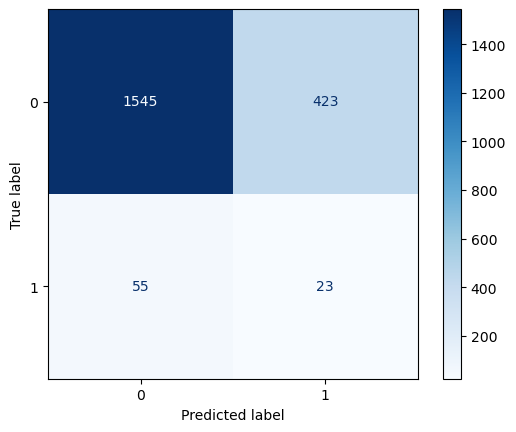

In [98]:




# Data preprocessing steps
df.dropna(inplace=True)

# # Detect and cap outliers using IQR
# Q1 = df.quantile(0.25)
# Q3 = df.quantile(0.75)
# IQR = Q3 - Q1
# df_capped = df.copy()
# for column in df.columns:
#     if column != 'Bankrupt?':
#         lower_bound = Q1[column] - 1.5 * IQR[column]
#         upper_bound = Q3[column] + 1.5 * IQR[column]
#         df_capped[column] = df[column].clip(lower_bound, upper_bound)

# Feature selection
model = LogisticRegression(max_iter=1000)
selected_features = df_capped.columns[:-1]  # Use all features

# Split the data
X_train, X_test, y_train, y_test = train_test_split(df_capped[selected_features], df_capped['Bankrupt?'], test_size=0.3, random_state=42)

# Handle class imbalance using SMOTE
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train the model
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred = logistic_model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
print(cm)

# Optionally, visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logistic_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

Key Insights:
Positive Correlations with Bankruptcy Probability:

Borrowing dependency (0.278), Total debt/Total net worth (0.273), Debt ratio % (0.247), and Liability to Equity (0.246) show moderate to strong positive correlations with the likelihood of bankruptcy. This suggests that companies with higher levels of borrowing relative to their assets or equity are more likely to face financial distress leading to bankruptcy.
Negative Correlations:

Retained Earnings to Total Assets (-0.255), Net Income to Total Assets (-0.256), and Persistent EPS in the Last Four Seasons (-0.256) exhibit moderate negative correlations with bankruptcy probability. Companies with higher retained earnings, net income, and persistent earnings per share (EPS) relative to their total assets tend to have lower risks of bankruptcy. These metrics indicate stronger financial health and profitability.
Financial Health Indicators:

Ratios related to profitability (e.g., net income), asset management (e.g., total assets), and financial leverage (e.g., debt ratios) are crucial in assessing bankruptcy risk. Companies should maintain healthy levels of profitability, manage debt effectively, and strengthen asset management practices to mitigate bankruptcy risk.
Implications for Financial Risk Management:
Early Warning Signs:

Monitoring borrowing dependency, debt ratios, and liability to equity ratios can serve as early warning signs of potential financial distress. Financial managers should regularly assess these ratios to identify companies at higher risk of bankruptcy.
Strategic Financial Planning:

Emphasize strategies to reduce borrowing dependency and optimize debt levels relative to assets and equity. This includes refinancing debts at favorable terms, negotiating with creditors, and diversifying funding sources to enhance financial stability.
Profitability and Efficiency:

Focus on improving profitability metrics such as net income and retained earnings. Enhancing operational efficiency and cost management can bolster financial resilience against economic downturns or market volatility.
Scenario Analysis and Stress Testing:

Conduct scenario analyses to evaluate the impact of adverse economic conditions or market shocks on financial ratios. Stress testing helps identify vulnerabilities and prepares contingency plans to mitigate potential risks.
Actionable Recommendations:
Enhance Financial Reporting and Transparency:

Improve transparency in financial reporting to accurately reflect borrowing levels, debt structures, and profitability metrics. Clear and comprehensive financial disclosures facilitate informed decision-making and risk assessment.
Implement Robust Risk Management Practices:

Develop and implement robust risk management frameworks that integrate quantitative analysis of financial ratios with qualitative assessments of market conditions and operational risks.
Invest in Data Analytics and Predictive Modeling:

Leverage advanced data analytics and predictive modeling techniques to enhance bankruptcy prediction capabilities. Develop machine learning models that incorporate significant financial ratios identified through correlation analysis for accurate risk assessment.
Continuous Monitoring and Evaluation:

Establish regular monitoring mechanisms to track changes in key financial ratios and update risk assessments accordingly. Continuous evaluation ensures proactive risk management and timely intervention.